# Monte-Carlo-Markov-Chain (MCMC) Simulation of customer behaviour in a supermarket

In [62]:
import pandas as pd
import numpy as np
from numpy.random import choice
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import datetime

plt.rcParams['figure.figsize'] = (14,6)
plt.rcParams['legend.loc'] = 'upper left'

## 1. EDA for the week 2.-6.9.2019

In [2]:
df_monday = pd.read_csv('~/Documents/spiced_work/own_code/week8/monday.csv', sep=";" )
df_tuesday = pd.read_csv('~/Documents/spiced_work/own_code/week8/tuesday.csv', sep=";" )
df_wednesday = pd.read_csv('~/Documents/spiced_work/own_code/week8/wednesday.csv', sep=";" )
df_thursday = pd.read_csv('~/Documents/spiced_work/own_code/week8/thursday.csv', sep=";" )
df_friday = pd.read_csv('~/Documents/spiced_work/own_code/week8/friday.csv', sep=";" )

In [3]:
frames = [df_monday, df_tuesday, df_wednesday, df_thursday, df_friday]

In [4]:
df_combined = pd.concat(frames)

In [5]:
df_monday.head(50)

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices
5,2019-09-02 07:04:00,6,spices
6,2019-09-02 07:04:00,7,spices
7,2019-09-02 07:04:00,8,fruit
8,2019-09-02 07:05:00,1,checkout
9,2019-09-02 07:05:00,5,checkout


In [6]:
df_combined.head(20)

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices
5,2019-09-02 07:04:00,6,spices
6,2019-09-02 07:04:00,7,spices
7,2019-09-02 07:04:00,8,fruit
8,2019-09-02 07:05:00,1,checkout
9,2019-09-02 07:05:00,5,checkout


In [7]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24877 entries, 0 to 5124
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    24877 non-null  object
 1   customer_no  24877 non-null  int64 
 2   location     24877 non-null  object
dtypes: int64(1), object(2)
memory usage: 777.4+ KB


In [8]:
df_combined['location'].unique()

array(['dairy', 'spices', 'fruit', 'checkout', 'drinks'], dtype=object)

In [10]:
df_combined['timestamp'] = pd.to_datetime(df_combined['timestamp'], infer_datetime_format=True)

In [11]:
df_combined['year'] = pd.DatetimeIndex(df_combined['timestamp']).year
df_combined['month'] = pd.DatetimeIndex(df_combined['timestamp']).month
df_combined['day'] = pd.DatetimeIndex(df_combined['timestamp']).day
df_combined['hour'] = pd.DatetimeIndex(df_combined['timestamp']).hour
df_combined['minute'] = pd.DatetimeIndex(df_combined['timestamp']).minute

In [12]:
df_combined

,timestamp,customer_no,location,year,month,day,hour,minute
0,2019-09-02 07:03:00,1,dairy,2019,9,2,7,3
1,2019-09-02 07:03:00,2,dairy,2019,9,2,7,3
2,2019-09-02 07:04:00,3,dairy,2019,9,2,7,4
3,2019-09-02 07:04:00,4,dairy,2019,9,2,7,4
4,2019-09-02 07:04:00,5,spices,2019,9,2,7,4
...,...,...,...,...,...,...,...,...
5120,2019-09-06 21:50:00,1500,dairy,2019,9,6,21,50
5121,2019-09-06 21:50:00,1507,checkout,2019,9,6,21,50
5122,2019-09-06 21:50:00,1508,checkout,2019,9,6,21,50
5123,2019-09-06 21:50:00,1509,drinks,2019,9,6,21,50


### 1.1 Calculate the number of customers in each section

In [13]:
df_combined.groupby('location')['customer_no'].count()

location
checkout    7417
dairy       4679
drinks      3905
fruit       5122
spices      3754
Name: customer_no, dtype: int64

<AxesSubplot:ylabel='Location'>

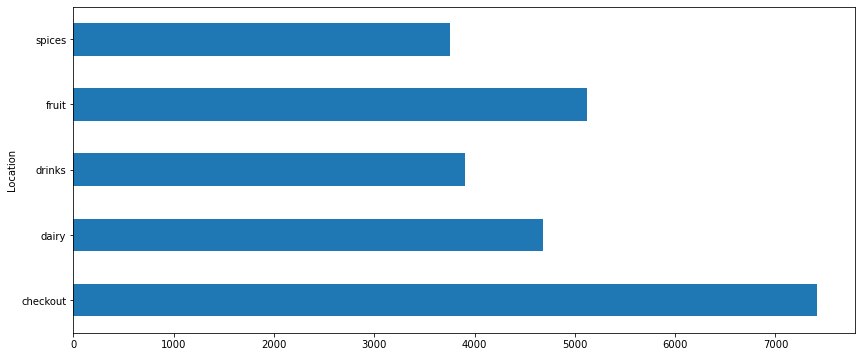

In [63]:
df_combined.groupby('location')['customer_no'].count().plot(xlabel='Location', ylabel='Nr. of customers',kind='barh')

### 1.2 Calculate the total number of customers in each section over time

In [15]:
df_combined.groupby(['day', 'hour', 'location'])['customer_no'].count().unstack()

location  checkout  dairy  drinks  fruit  spices
day hour                                        
2   7           92     59      60     54      52
    8          112     68      65     68      51
    9           85     50      57     76      40
    10          90     58      35     47      52
    11          55     36      24     41      33
...            ...    ...     ...    ...     ...
6   17         115     73      76     87      65
    18         148    105      93    104      98
    19         135     84      76     93      65
    20         103     53      56     69      54
    21          52     39      34     36      20

[75 rows x 5 columns]

array([<AxesSubplot:title={'center':'checkout'}, xlabel='day,hour'>,
       <AxesSubplot:title={'center':'dairy'}, xlabel='day,hour'>,
       <AxesSubplot:title={'center':'drinks'}, xlabel='day,hour'>,
       <AxesSubplot:title={'center':'fruit'}, xlabel='day,hour'>,
       <AxesSubplot:title={'center':'spices'}, xlabel='day,hour'>],
      dtype=object)

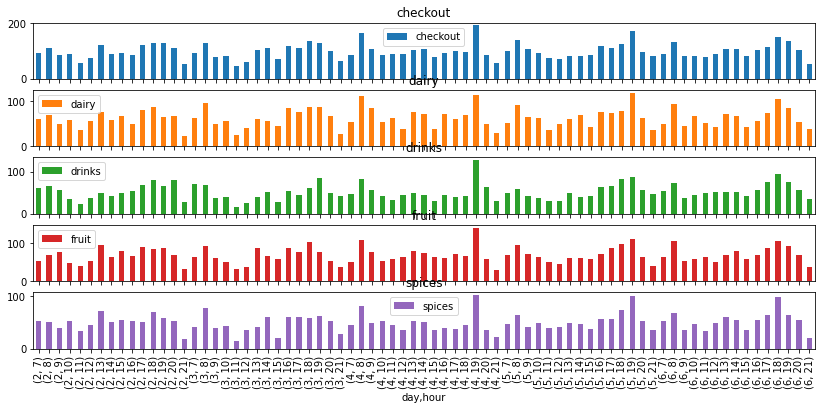

In [66]:
df_combined.groupby(['day', 'hour', 'location'])['customer_no'].count().unstack().plot(subplots=True, kind='bar')

array([<AxesSubplot:xlabel='day,hour'>, <AxesSubplot:xlabel='day,hour'>,
       <AxesSubplot:xlabel='day,hour'>, <AxesSubplot:xlabel='day,hour'>,
       <AxesSubplot:xlabel='day,hour'>], dtype=object)

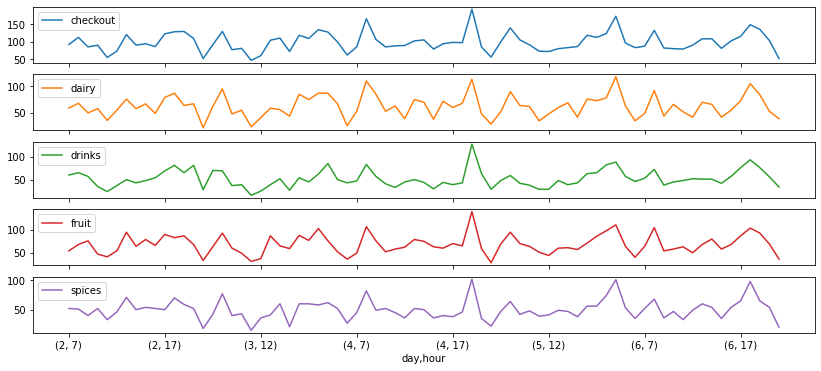

In [78]:
df_combined.groupby(['day', 'hour', 'location'])['customer_no'].count().unstack().plot(subplots=True)

### 1.3 Display the number of customers at checkout over time

In [19]:
ch = df_combined.loc[df_combined['location'] == 'checkout']

In [20]:
ch.groupby('hour')['customer_no'].count()

hour
7     454
8     677
9     455
10    427
11    342
12    384
13    514
14    496
15    412
16    518
17    556
18    630
19    755
20    492
21    305
Name: customer_no, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

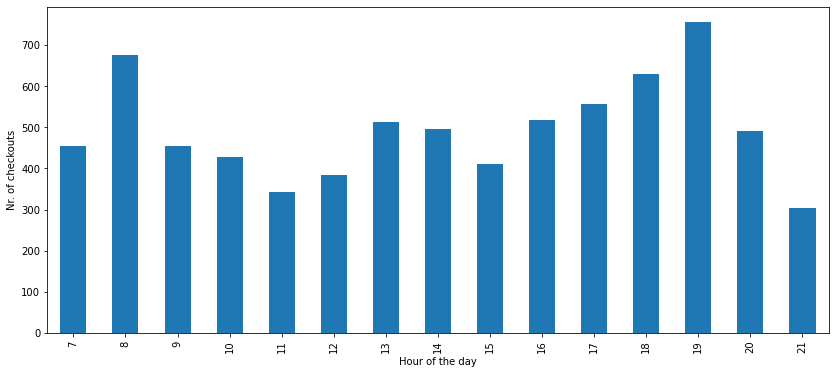

In [65]:
ch.groupby('hour')['customer_no'].count().plot(xlabel='Hour of the day', ylabel='Nr. of checkouts', ylim=False, kind='bar')
plt.show

In [22]:
# Creating a checkout-list for 1.5
checkout = list(ch.groupby('hour')['customer_no'].count())
checkout

[454, 677, 455, 427, 342, 384, 514, 496, 412, 518, 556, 630, 755, 492, 305]

 ### 1.4 Calculate the time each customer spent in the market

In [23]:
customer_in_market = df_combined.groupby(by=['day','customer_no'])['minute'].transform(lambda x: x.max() -x.min())

In [24]:
customer_in_market

0       2
1       3
2       2
3       4
4       1
       ..
5120    9
5121    2
5122    2
5123    0
5124    0
Name: minute, Length: 24877, dtype: int64

In [25]:
customer_in_market.max()

59

In [26]:
customer_in_market.value_counts()

1     2534
2     2198
3     2011
4     1900
5     1660
6     1523
7     1420
8      947
9      931
10     852
12     685
13     626
11     626
58     614
59     573
14     485
15     462
56     420
57     414
17     354
16     344
55     290
18     287
54     269
19     265
21     240
20     214
23     144
53     139
22     132
51     117
52     116
50     106
24     105
25      97
49      76
29      51
32      51
48      48
45      44
46      44
39      43
31      41
27      40
30      38
47      35
41      34
37      33
26      29
28      28
42      26
34      26
33      26
40      17
44      14
43      13
0        9
35       6
36       5
Name: minute, dtype: int64

<AxesSubplot:xlabel='Number of minutes', ylabel='Occurence (Nr. of customers)'>

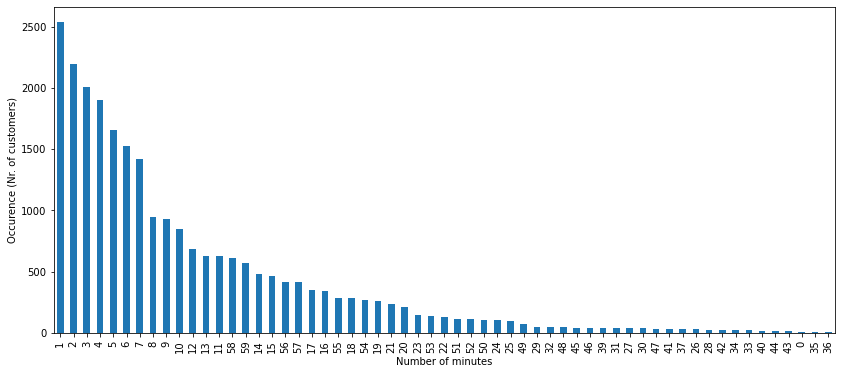

In [27]:
customer_in_market.value_counts(ascending=False).plot(xlabel= 'Number of minutes',ylabel='Occurence (Nr. of customers)', kind='bar')

In [28]:
customer_in_market.mean()

14.167745306909998

In [115]:
customer_in_market.median()

7.0

### 1.5 Calculate the total number of customers in the supermarket over time

In [33]:
# Counting all customers per hour
hour_count = df_combined.groupby('hour')['customer_no'].count()

<AxesSubplot:xlabel='hour'>

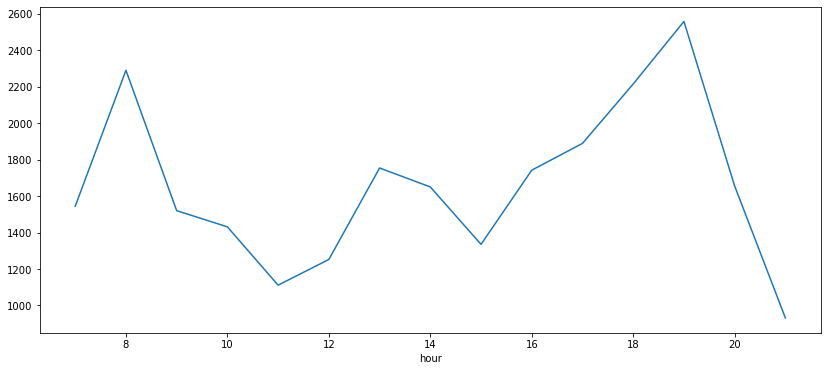

In [79]:
df_combined.groupby('hour')['customer_no'].count().plot()

<AxesSubplot:xlabel='hour'>

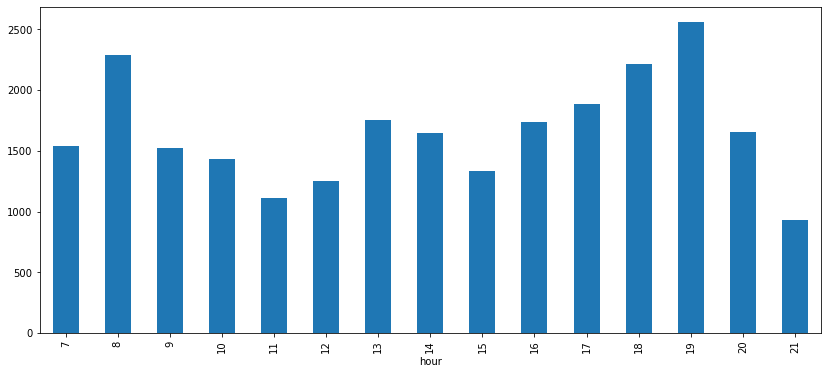

In [34]:
df_combined.groupby('hour')['customer_no'].count().plot(kind='bar')

In [35]:
type(hour_count)

pandas.core.series.Series

In [36]:
hour_count

hour
7     1544
8     2290
9     1520
10    1431
11    1111
12    1252
13    1754
14    1650
15    1335
16    1742
17    1889
18    2215
19    2558
20    1655
21     931
Name: customer_no, dtype: int64

In [37]:
checkout

[454, 677, 455, 427, 342, 384, 514, 496, 412, 518, 556, 630, 755, 492, 305]

In [38]:
# Subtracting the checkouts per hour for a total count/h
total_customs = hour_count - checkout

In [39]:
total_customs

hour
7     1090
8     1613
9     1065
10    1004
11     769
12     868
13    1240
14    1154
15     923
16    1224
17    1333
18    1585
19    1803
20    1163
21     626
Name: customer_no, dtype: int64

<AxesSubplot:xlabel='Hour of the day', ylabel='Nr. of customers in the supermarket'>

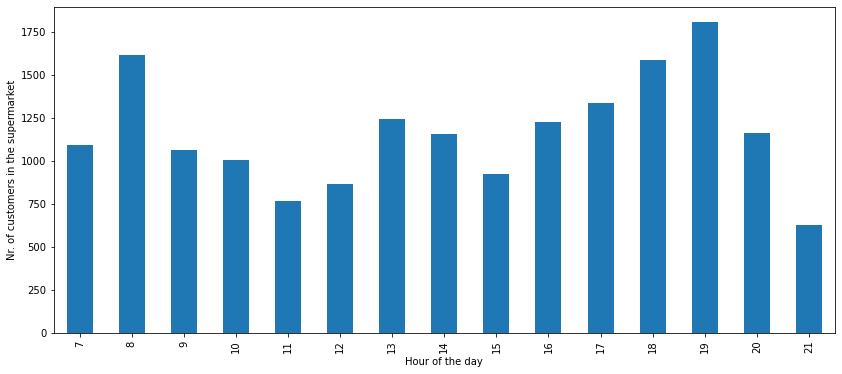

In [40]:
total_customs.plot(xlabel= 'Hour of the day', ylabel= 'Nr. of customers in the supermarket', kind='bar')

### 1.6 Plot the distribution of customers of their first visited section versus following sections as basis for a MCMC-simulation

In [46]:
df_combined['next_loc'] = df_combined.groupby(['day', 'customer_no'])['location'].transform(lambda x: x.shift(-1))

In [47]:
df_combined.head(15)

In [48]:
df_combined.isna().sum()

In [49]:
df_combined['next_loc'] = df_combined['next_loc'].fillna('checkout')

In [50]:
states_probab = pd.crosstab(df_combined['location'], df_combined['next_loc'], normalize=0)

In [51]:
states_probab

next_loc,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,1.000000,0.000000,0.000000,0.000000,0.000000
dairy,0.393033,0.000000,0.222483,0.189357,0.195127
drinks,0.537260,0.027145,0.000000,0.218950,0.216645
fruit,0.500195,0.237993,0.136080,0.000000,0.125732
spices,0.251998,0.323122,0.272776,0.152104,0.000000


<AxesSubplot:xlabel='next_loc', ylabel='location'>

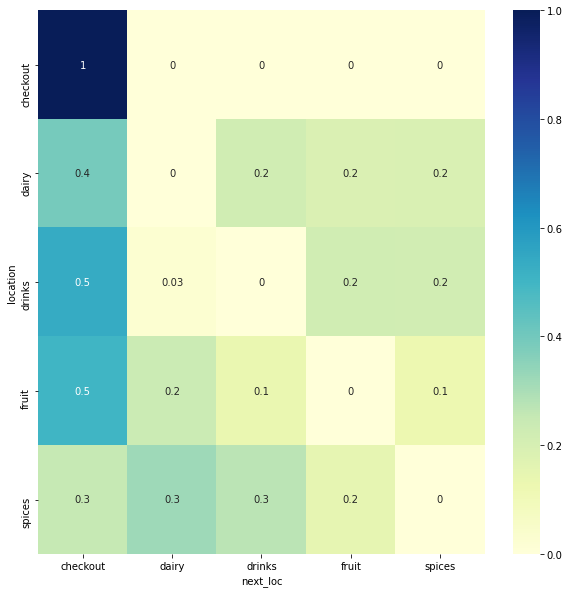

In [52]:
plt.figure(figsize=(10,10)) 
sns.heatmap(states_probab,
            cmap="YlGnBu",
            annot = True,
           fmt='.1g')

<AxesSubplot:xlabel='location'>

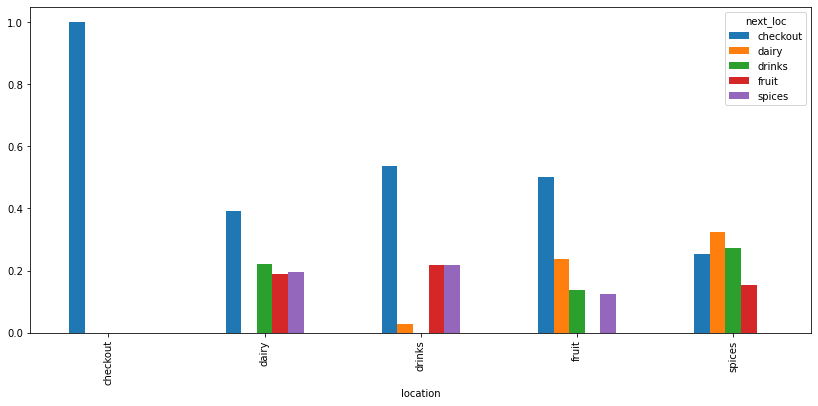

In [94]:
states_probab.plot(kind='bar')

## 2.1 Creating a customer-class

In [116]:
class Customer:
    """
    a single customer that moves through the supermarket
    in a MCMC simulation
    """
    def __init__(self, name, state, states_probab, budget=100):
        self.name = name
        self.state = state
        self.states_probab = states_probab
        self.budget = budget
    
    def __repr__(self):
        return f'<Customer {self.name} is in {self.state} with {self.budget} bucks>'
    
    def next_state(self):
        '''
        Propagates the customer to the next state.
        Returns nothing.
        '''
        self.state = np.random.choice(['checkout','dairy','drinks','fruit','spices'], p=states_probab.loc[self.state]) 
        
    def is_active(self):
        return self.state != 'checkout'

cust1 = Customer('Skullcrusher McMetal', 'drinks', states_probab, 100)     

In [117]:
print(cust1)

<Customer Skullcrusher McMetal is in drinks with 100 bucks>


In [118]:
cust1.next_state()

In [119]:
print(cust1)

<Customer Skullcrusher McMetal is in checkout with 100 bucks>


In [120]:
cust1.is_active()

False